In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 

In [3]:
import itertools

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [5]:
def mean_absolute_percentage_error(y,y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return 100*np.mean(np.abs((y-y_pred)/y))

In [6]:
df = pd.read_excel('desktop/sce.xlsx')

In [7]:
# 1. fit a model with all predictiors and report r-square and MAPE

In [8]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df['dayofweek'] = df['Date'].dt.dayofweek
df[:5]

,Date,Load,temp,year,month,day,hour,dayofweek
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2


In [9]:
model = smf.ols('Load ~ C(year) + C(month) + C(day) + C(hour) + C(dayofweek)', data = df).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     1831.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:58:33   Log-Likelihood:            -4.2803e+05
No. Observations:               49680   AIC:                         8.562e+05
Df Residuals:                   49604   BIC:                         8.569e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          9640.2290     51.605    186.809      0.000    9539.083    9741.375
C(year)[T.2015]     -84.1114     20.191     -4.166      0.000    -123.686     -44.537
C(year)[T.2016]    -130.9956     20.177     -6.492      0.000    -170.543     -91.448
C(year)[T.2017]      21.8464     20.191      1.082      0.279     -17.728      61.421
C(year)[T.2018]    -282.7423     20.191    -14.004      0.000    -322.316    -243.168
C(year)[T.2019]    -773.9691     22.993    -33.660      0.000    -819.037    -728.902
C(month)[T.2]      -157.8127     29.063     -5.430      0.000    -214.776    -100.850
C(month)[T.3]      -181.2983     28.285     -6.410      0.000    -236.736    -125.860
C(month)[T.4]        -2.0251     28.554     -0.071      0.943     -57.992      53.942
C(month)[T.5]       322.3307     28.284     11.396      0.000     266.894     377.768
C(month)[T.6]      1925.1087     28.554     67.419      0.000    1869.142    1981.076
C(month)[T.7]      3734.7382     28.285    132.042      0.000    3679.300    3790.176
C(month)[T.8]      3915.8616     28.284    138.446      0.000    3860.424    3971.299
C(month)[T.9]      2792.2356     30.069     92.860      0.000    2733.299    2851.172
C(month)[T.10]     1156.5636     29.836     38.764      0.000    1098.085    1215.042
C(month)[T.11]      -13.2162     30.136     -0.439      0.661     -72.283      45.850
C(month)[T.12]      116.6460     29.836      3.910      0.000      58.168     175.124
C(day)[T.2]          60.0286     46.612      1.288      0.198     -31.331     151.388
C(day)[T.3]         -22.6330     46.611     -0.486      0.627    -113.991      68.725
C(day)[T.4]        -186.8982     46.612     -4.010      0.000    -278.258     -95.538
C(day)[T.5]        -131.4270     46.612     -2.820      0.005    -222.787     -40.067
C(day)[T.6]         -53.5055     46.612     -1.148      0.251    -144.865      37.854
C(day)[T.7]          14.8658     46.612      0.319      0.750     -76.494     106.226
C(day)[T.8]          98.7208     46.611      2.118      0.034       7.363     190.078
C(day)[T.9]         118.9004     46.612      2.551      0.011      27.541     210.260
C(day)[T.10]        113.4199     46.611      2.433      0.015      22.062     204.778
C(day)[T.11]         94.5241     46.612      2.028      0.043       3.164     185.884
C(day)[T.12]         67.8534     46.612      1.456      0.145     -23.506     159.213
C(day)[T.13]         90.6218     46.612      1.944      0.052      -0.738     181.982
C(day)[T.14]         89.8886     46.612      1.928      0.054      -1.471     181.248
C(day)[T.15]         74.7494     46.611      1.604      0.109     -16.608     166.107
C(day)[T.16]         39.9288     46.612      0.857      0.392     -51.431     131.289
C(day)[T.17]         -7.8561     46.611     -0.169      0.866     -99.214

In [11]:
df['prediction'] = model.predict(df)
df[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,prediction
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,9867.189014
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,9384.729823
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,9067.180141
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,8908.785681
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,9001.538782


In [12]:
load = df.Load
y_pred1 = df.prediction
MAPE = mean_absolute_percentage_error(load,y_pred1)
MAPE

8.009718299485478

In [13]:
# The r-square = 0.735, MAPE = 8.006836082126318

In [14]:
# 2. Plot of Load as a function of time

In [15]:
load = df.Load
time = df.Date

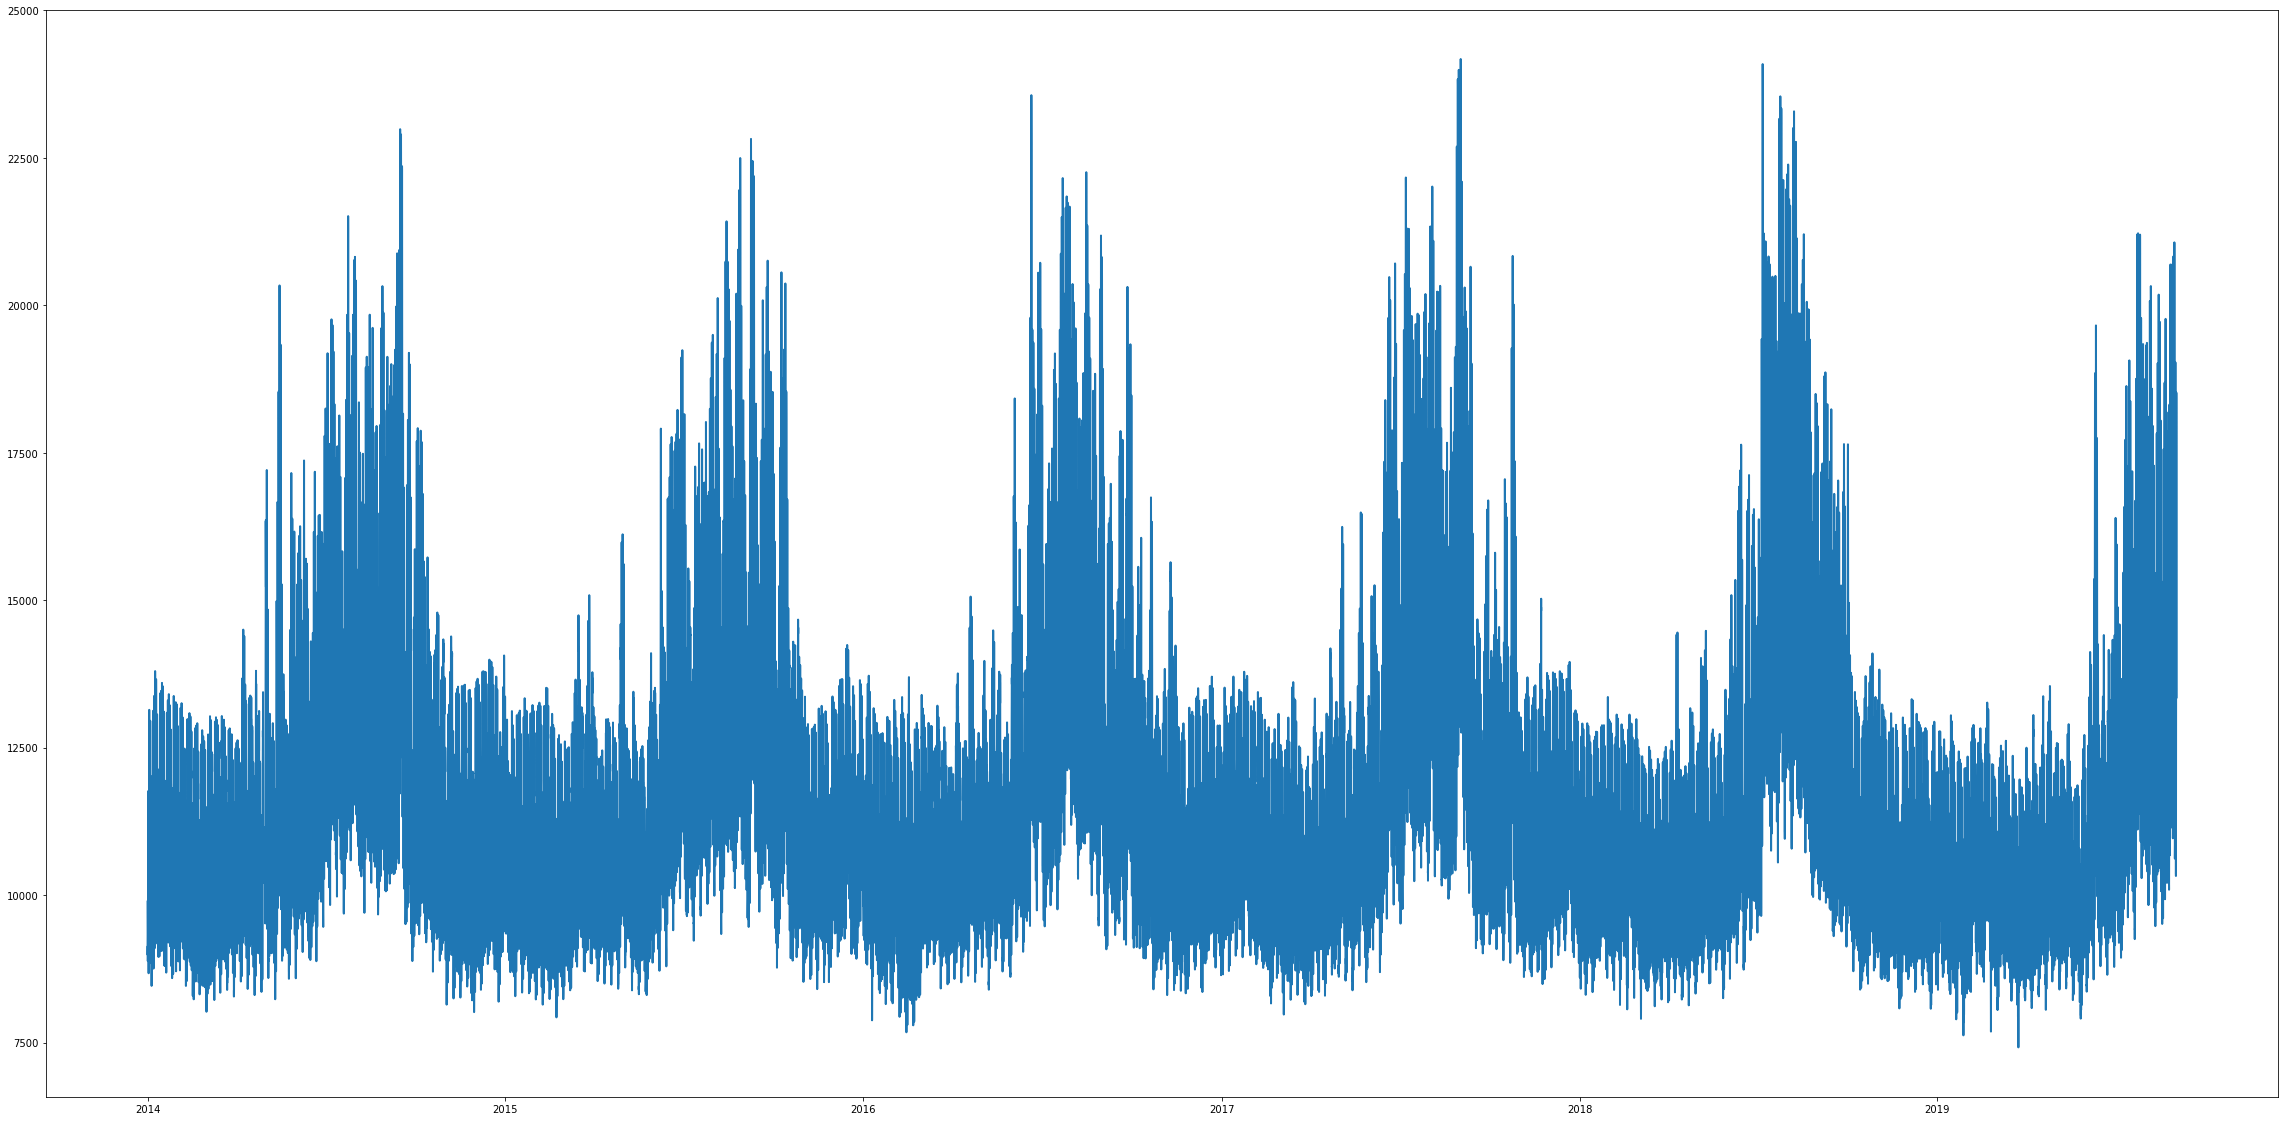

In [16]:
plt.figure(figsize = (40,20))
plt.plot(time,load,linewidth = 2)

In [17]:
# 3.Construct a scatterplot of Load vs temp 

In [18]:
temp = df.temp
temp1 = temp.values.reshape(-1,1)

In [19]:
model1 = LinearRegression().fit(temp1,load)
yhat = model1.predict(temp1)

Text(0, 0.5, 'load')

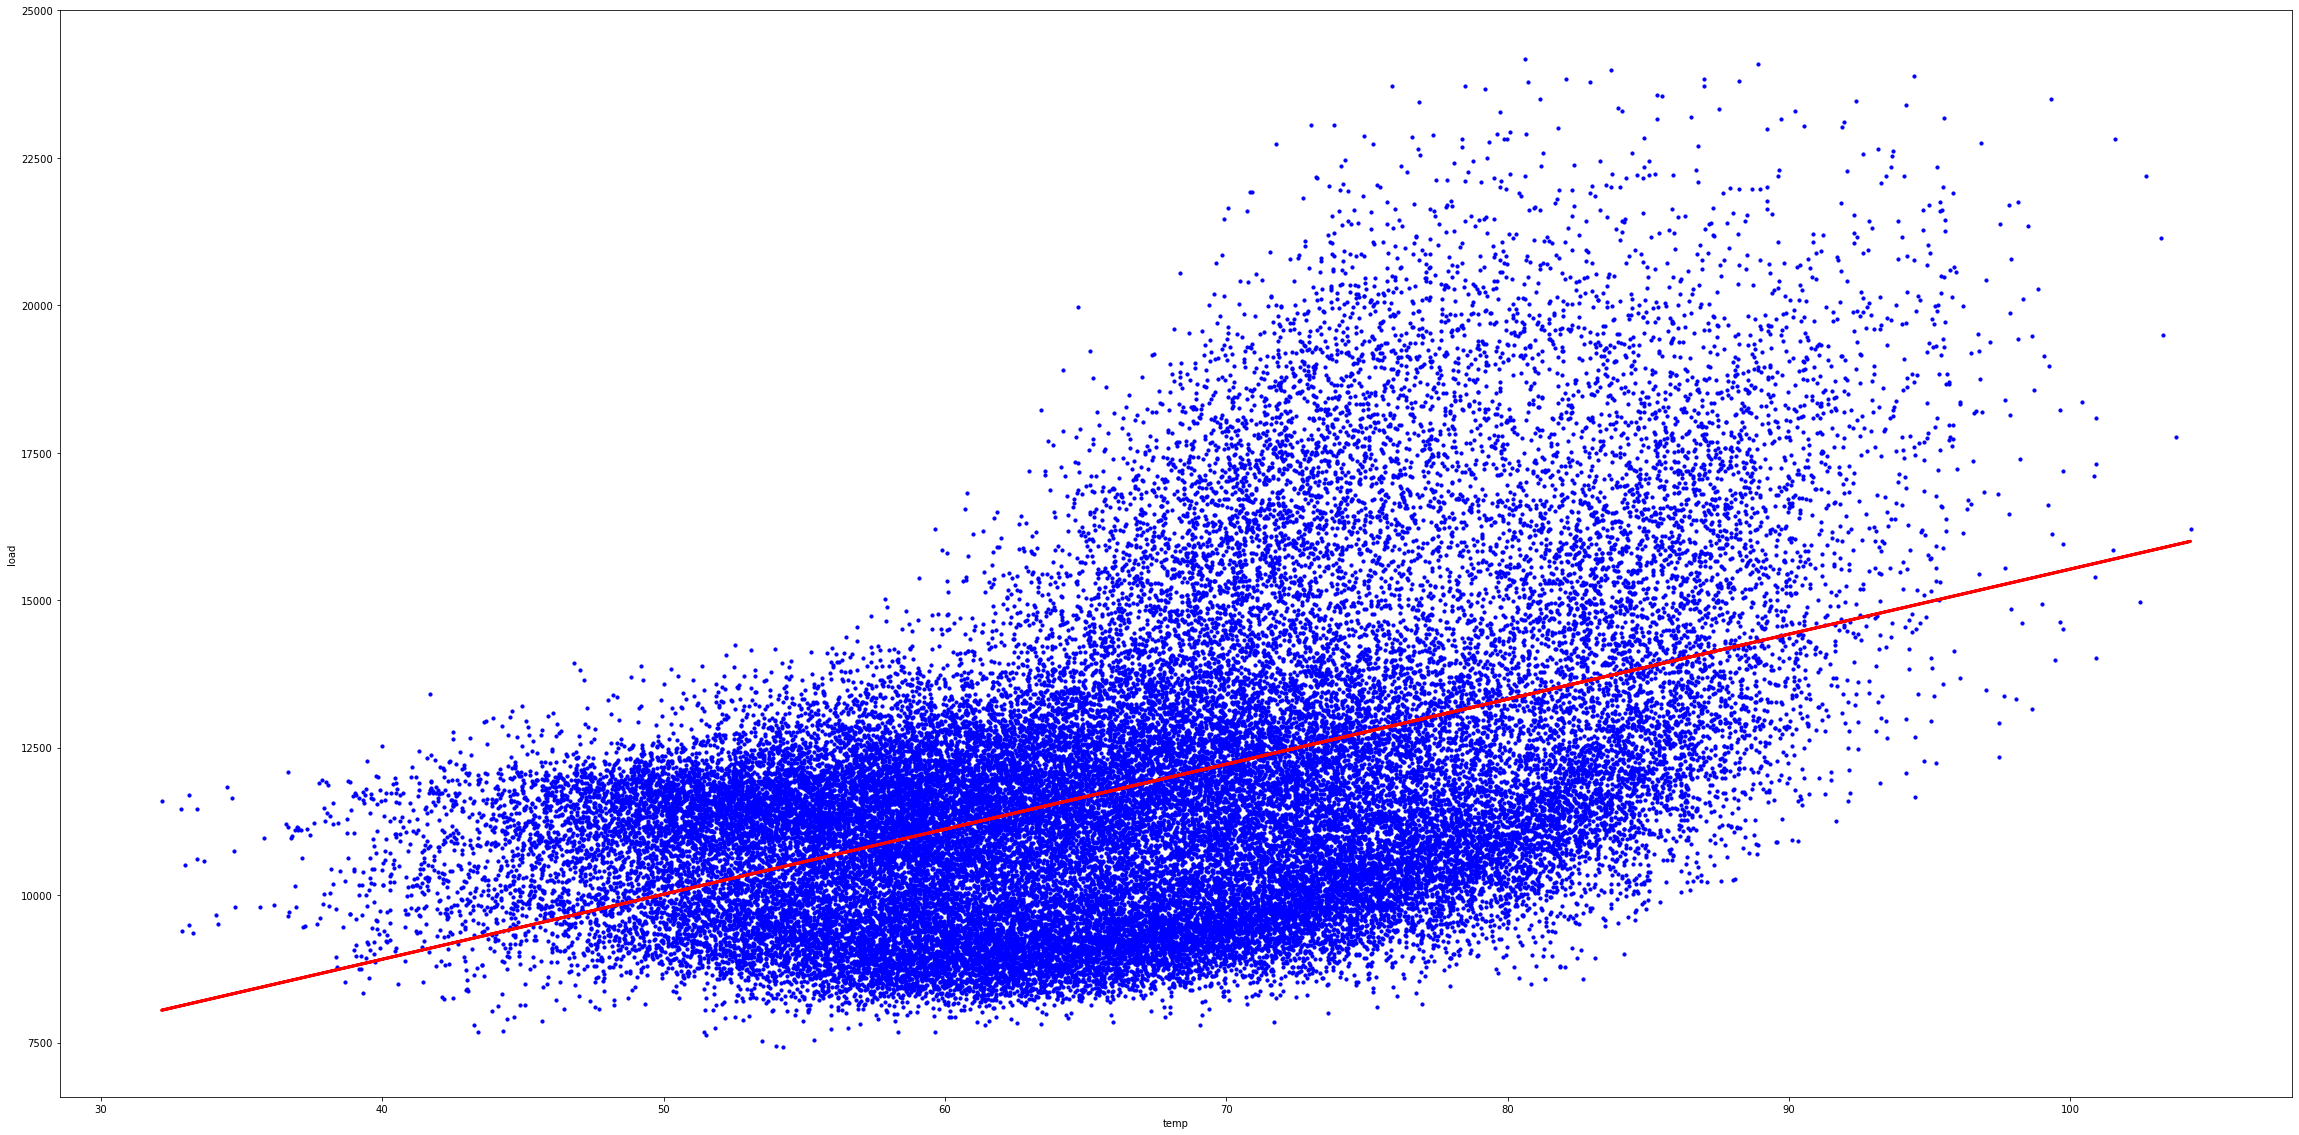

In [20]:
plt.figure(figsize = (40,20))
plt.scatter(temp,load,c='b',s=10)
plt.plot(temp,yhat,c='r',lw=3)
plt.xlabel('temp')
plt.ylabel('load')

In [21]:
# 4. Fit a new model

In [22]:
df['squareTemp']=df['temp']*df['temp']

In [23]:
model2 = smf.ols('Load ~ temp + squareTemp + temp*C(hour) + squareTemp*C(hour)', data = df).fit()

In [24]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     3268.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:58:45   Log-Likelihood:            -4.1786e+05
No. Observations:               49680   AIC:                         8.359e+05
Df Residuals:                   49608   BIC:                         8.365e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.533e+04   1390.069     25.416      0.000    3.26e+04    3.81e+04
C(hour)[T.1]             -3328.4370   1938.769     -1.717      0.086   -7128.448     471.574
C(hour)[T.2]             -6399.7850   1911.178     -3.349      0.001   -1.01e+04   -2653.854
C(hour)[T.3]             -5838.8078   1948.891     -2.996      0.003   -9658.657   -2018.958
C(hour)[T.4]             -5109.5903   1947.779     -2.623      0.009   -8927.261   -1291.920
C(hour)[T.5]             -4385.0370   1908.939     -2.297      0.022   -8126.580    -643.494
C(hour)[T.6]             -3343.6612   1876.450     -1.782      0.075   -7021.524     334.202
C(hour)[T.7]             -2997.0211   1852.281     -1.618      0.106   -6627.515     633.472
C(hour)[T.8]             -2464.8337   1824.322     -1.351      0.177   -6040.527    1110.859
C(hour)[T.9]             -2799.3320   1788.810     -1.565      0.118   -6305.420     706.756
C(hour)[T.10]            -2745.9269   1746.775     -1.572      0.116   -6169.627     677.773
C(hour)[T.11]            -1782.4463   1721.802     -1.035      0.301   -5157.198    1592.305
C(hour)[T.12]            -1045.7694   1701.701     -0.615      0.539   -4381.123    2289.585
C(hour)[T.13]              -24.1836   1684.417     -0.014      0.989   -3325.661    3277.294
C(hour)[T.14]              535.7588   1643.859      0.326      0.744   -2686.224    3757.741
C(hour)[T.15]             1861.0747   1584.023      1.175      0.240   -1243.629    4965.779
C(hour)[T.16]             5164.4595   1598.423      3.231      0.001    2031.532    8297.387
C(hour)[T.17]             1.349e+04   1672.914      8.062      0.000    1.02e+04    1.68e+04
C(hour)[T.18]             1.622e+04   1756.867      9.233      0.000    1.28e+04    1.97e+04
C(hour)[T.19]             1.438e+04   1813.443      7.930      0.000    1.08e+04    1.79e+04
C(hour)[T.20]              1.29e+04   1868.688      6.902      0.000    9235.136    1.66e+04
C(hour)[T.21]             1.103e+04   1907.284      5.781      0.000    7287.136    1.48e+04
C(hour)[T.22]             7536.5452   1931.244      3.902      0.000    3751.284    1.13e+04
C(hour)[T.23]             3570.2136   1953.436      1.828      0.068    -258.545    7398.972
temp                      -792.5029     37.746    -20.996      0.000    -866.485    -718.520
temp:C(hour)[T.1]           76.5365     53.304      1.436      0.151     -27.940     181.014
temp:C(hour)[T.2]          143.5505     53.459      2.685      0.007      38.770     248.331
temp:C(hour)[T.3]          105.0950     55.676      1.888      0.059      -4.031     214.221
temp:C(hour)[T.4]           76.6455     56.380      1.359      0.174     -33.860     187.151
temp:C(hour)[T.5]           64.4705     55.623      1.159      0.246     -44.550     173.491
temp:C(hour)[T

In [25]:
df2 = df.drop(['prediction'],axis=1)
df2['prediction']=model2.predict(df2)
df2[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,squareTemp,prediction
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,3536.502492,9623.415088
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,3770.328409,9113.668537
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,3028.410961,9121.281938
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,2828.942069,9080.337574
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,2703.417631,9274.242045


In [26]:
y_pred2 = df2.prediction
MAPE2 = mean_absolute_percentage_error(load,y_pred2)
MAPE2

6.8629101110656645

In [27]:
# The r-square = 0.824, MAPE = 6.8629101110656645

In [28]:
# 5. use "lag24" as an additional prediction
# fit the MLR model and report the MAPE and r-square.

In [29]:
df['lag24'] = df['Load'].shift(24)
model3 = smf.ols('Load ~ C(year) + C(month) + C(day) + C(hour) + C(dayofweek) + lag24', data = df).fit()

In [30]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     8057.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:58:50   Log-Likelihood:            -3.9643e+05
No. Observations:               49656   AIC:                         7.930e+05
Df Residuals:                   49579   BIC:                         7.937e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2536.2931     34.149     74.272      0.000    2469.361    2603.225
C(year)[T.2015]     -17.4687     10.738     -1.627      0.104     -38.516       3.579
C(year)[T.2016]     -23.5013     10.734     -2.189      0.029     -44.540      -2.463
C(year)[T.2017]      -0.3944     10.737     -0.037      0.971     -21.438      20.650
C(year)[T.2018]     -49.8141     10.757     -4.631      0.000     -70.899     -28.730
C(year)[T.2019]    -121.3746     12.366     -9.815      0.000    -145.613     -97.137
C(month)[T.2]       -40.4233     15.468     -2.613      0.009     -70.741     -10.106
C(month)[T.3]       -33.7642     15.057     -2.242      0.025     -63.276      -4.252
C(month)[T.4]         3.3764     15.194      0.222      0.824     -26.404      33.157
C(month)[T.5]        54.5324     15.068      3.619      0.000      24.999      84.066
C(month)[T.6]       354.3400     15.819     22.399      0.000     323.334     385.346
C(month)[T.7]       621.3384     17.410     35.689      0.000     587.215     655.461
C(month)[T.8]       593.5824     17.713     33.512      0.000     558.865     628.299
C(month)[T.9]       362.7235     17.393     20.854      0.000     328.632     396.815
C(month)[T.10]      118.5349     16.138      7.345      0.000      86.904     150.165
C(month)[T.11]      -14.9516     16.035     -0.932      0.351     -46.379      16.476
C(month)[T.12]        6.6152     15.878      0.417      0.677     -24.505      37.735
C(day)[T.2]         141.1821     24.861      5.679      0.000      92.453     189.911
C(day)[T.3]         -19.4607     24.860     -0.783      0.434     -68.186      29.265
C(day)[T.4]        -113.5133     24.861     -4.566      0.000    -162.242     -64.785
C(day)[T.5]          80.4686     24.869      3.236      0.001      31.725     129.212
C(day)[T.6]         111.7066     24.866      4.492      0.000      62.969     160.444
C(day)[T.7]         114.2249     24.863      4.594      0.000      65.494     162.956
C(day)[T.8]         140.1470     24.860      5.637      0.000      91.420     188.874
C(day)[T.9]          89.7190     24.860      3.609      0.000      40.993     138.444
C(day)[T.10]         66.8306     24.860      2.688      0.007      18.105     115.556
C(day)[T.11]         52.9098     24.860      2.128      0.033       4.184     101.635
C(day)[T.12]         41.8758     24.860      1.684      0.092      -6.851      90.602
C(day)[T.13]         87.3914     24.860      3.515      0.000      38.665     136.118
C(day)[T.14]         67.4236     24.860      2.712      0.007      18.697     116.150
C(day)[T.15]         52.7623     24.860      2.122      0.034       4.037     101.488
C(day)[T.16]         31.0092     24.860      1.247      0.212     -17.716      79.735
C(day)[T.17]         12.3056     24.860      0.495      0.621     -36.420

In [31]:
df3 = df.drop(['prediction','squareTemp'],axis=1)
df3['prediction']=model3.predict(df3)
df3 = df3.dropna()
df3[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,lag24,prediction
24,2014-01-02 00:00:00,9191.0,68.0000,2014,1,2,0,3,9891.0,9944.071194
25,2014-01-02 01:00:00,8860.0,61.5641,2014,1,2,1,3,9553.0,9583.513435
26,2014-01-02 02:00:00,8682.0,57.2234,2014,1,2,2,3,9222.0,9254.499006
27,2014-01-02 03:00:00,8676.0,54.9374,2014,1,2,3,3,9024.0,9062.522930
28,2014-01-02 04:00:00,8917.0,54.9734,2014,1,2,4,3,8987.0,9045.536287


In [32]:
y_pred3 = df3.prediction
y3 = df3.Load
MAPE3 = mean_absolute_percentage_error(y3, y_pred3)
MAPE3

4.171370898680876

In [33]:
# The r-square = 0.925, MAPE = 4.171370898680876

In [34]:
# 6 plot  partial  autocorrelations
# Fit a MLR model with the additional lags found and report the MAPE and r-square

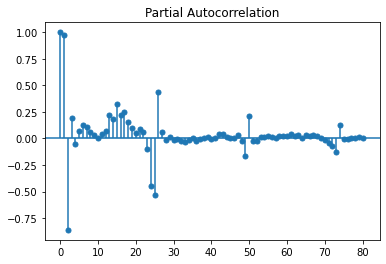

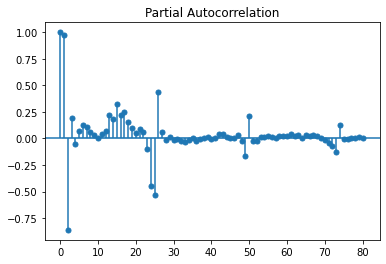

In [35]:
sm.graphics.tsa.plot_pacf(load, lags = 80)

In [36]:
model4 = smf.ols('Load ~ lag24', data = df).fit()

In [37]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 3.122e+05
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:59:15   Log-Likelihood:            -4.1146e+05
No. Observations:               49656   AIC:                         8.229e+05
Df Residuals:                   49654   BIC:                         8.229e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    843.8306     20.214     41.745      0.000     804.211     883.450
lag24          0.9291      0.002    558.710      0.000       0.926       0.932
==============================================================================
Omnibus:                     7537.565   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22291.508
Skew:                           0.806   Prob(JB):                         0.00
Kurtosis:                       5.860   Cond. No.                     5.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
df4 = df.drop(['prediction','squareTemp'],axis=1)
df4['prediction']=model4.predict(df4)
df4 = df4.dropna()

In [43]:
y_pred4 = df4.prediction
y4 = df4.Load
MAPE4 = mean_absolute_percentage_error(y4,y_pred4)
MAPE4

5.535571068805112

In [41]:
# The r-square = 0.863, MAPE = 5.535571068805112

In [42]:
# 7 Fit the best model found and report the MAPE and r-square for the test set

In [44]:
df_2019 = df[df['year']==2019]
y_test = df_2019.Load
x_test = df_2019.drop(columns = ['Load','Date','prediction','squareTemp'], axis = 1)
x_test[:5]

,temp,year,month,day,hour,dayofweek,lag24
43824,57.92850,2019,1,1,0,1,9352.0
43825,57.03736,2019,1,1,1,1,8967.0
43826,55.31236,2019,1,1,2,1,8755.0
43827,52.90550,2019,1,1,3,1,8707.0
43828,50.70200,2019,1,1,4,1,8881.0


In [45]:
df_train = df[df['year']!=2019]
df_train = df_train.dropna()
df_train = df_train.drop(columns = ['squareTemp','prediction'], axis = 1)
df_train[:5]

,Date,Load,temp,year,month,day,hour,dayofweek,lag24
24,2014-01-02 00:00:00,9191.0,68.0000,2014,1,2,0,3,9891.0
25,2014-01-02 01:00:00,8860.0,61.5641,2014,1,2,1,3,9553.0
26,2014-01-02 02:00:00,8682.0,57.2234,2014,1,2,2,3,9222.0
27,2014-01-02 03:00:00,8676.0,54.9374,2014,1,2,3,3,9024.0
28,2014-01-02 04:00:00,8917.0,54.9734,2014,1,2,4,3,8987.0


In [46]:
y_train = df_train.Load
x_train = df_train.drop(columns = ['Load','Date'], axis = 1)
x_train['year'] = x_train['year'].astype(object)
x_train['month'] = x_train['month'].astype(object)
x_train['day'] = x_train['day'].astype(object)
x_train['hour'] = x_train['hour'].astype(object)
x_train['dayofweek'] = x_train['dayofweek'].astype(object)
x_train[:5]

,temp,year,month,day,hour,dayofweek,lag24
24,68.0000,2014,1,2,0,3,9891.0
25,61.5641,2014,1,2,1,3,9553.0
26,57.2234,2014,1,2,2,3,9222.0
27,54.9374,2014,1,2,3,3,9024.0
28,54.9734,2014,1,2,4,3,8987.0


In [47]:
num = len(x_train.columns)

In [48]:
r2, MAPE, features, num_feature = [],[],[],[]

In [49]:
for k in range(1,num+1):
    for subset in itertools.combinations(x_train.columns,k):
        features.append(subset)
        num_feature.append(len(subset))
        
        x_train2 = x_train[list(subset)]
        x_test2 = x_test[list(subset)]
        model = LinearRegression().fit(x_train2,y_train)
        yhat = model.predict(x_test2)
        R_squared = model.score(x_train2,y_train)
        mape = mean_absolute_percentage_error(y_test,yhat)
        
        MAPE.append(mape)
        r2.append(R_squared)

In [50]:
zip1 = zip(features, num_feature,r2, MAPE)
data = pd.DataFrame(list(zip1),
                  columns = ['features','num_features','R-squared','MAPE'])

In [51]:
data.shape

(127, 4)

In [52]:
data.sample(9)

,features,num_features,R-squared,MAPE
4,"(hour,)",1,0.215547,15.848906
56,"(month, hour, dayofweek)",3,0.277400,12.940256
34,"(temp, month, hour)",3,0.377769,12.619128
120,"(temp, year, month, day, hour, lag24)",6,0.866234,5.759242
39,"(temp, day, lag24)",3,0.864634,5.831509
13,"(year, month)",2,0.033784,14.992905
84,"(year, month, day, dayofweek)",4,0.062674,14.563505
69,"(temp, year, day, lag24)",4,0.864638,5.805901
16,"(year, dayofweek)",2,0.029364,16.805519


In [53]:
best_mape = data.groupby(['num_features'])['MAPE'].min()
best_mape

num_features
1    5.827797
2    4.786302
3    4.717931
4    4.703762
5    4.700788
6    4.691712
7    4.694798
Name: MAPE, dtype: float64

In [54]:
data2 = pd.DataFrame()
for i in range(1,8):
    data2 = data2.append(data[data['MAPE'] == best_mape[i]])

In [55]:
pd.set_option('display.max_colwidth',190)
data2

,features,num_features,R-squared,MAPE
6,"(lag24,)",1,0.862362,5.827797
27,"(dayofweek, lag24)",2,0.904395,4.786302
42,"(temp, dayofweek, lag24)",3,0.906294,4.717931
72,"(temp, year, dayofweek, lag24)",4,0.906298,4.703762
103,"(temp, year, month, dayofweek, lag24)",5,0.906301,4.700788
122,"(temp, year, month, hour, dayofweek, lag24)",6,0.907560,4.691712
126,"(temp, year, month, day, hour, dayofweek, lag24)",7,0.907570,4.694798


In [56]:
# model with the smallest MAPE(4.691712) 
# is the one with six predictors: temp, year, month, hour, dayofweek, lag24

In [56]:
# 8 seasonal chart

Text(0.5, 1.0, 'Seasonal Load')

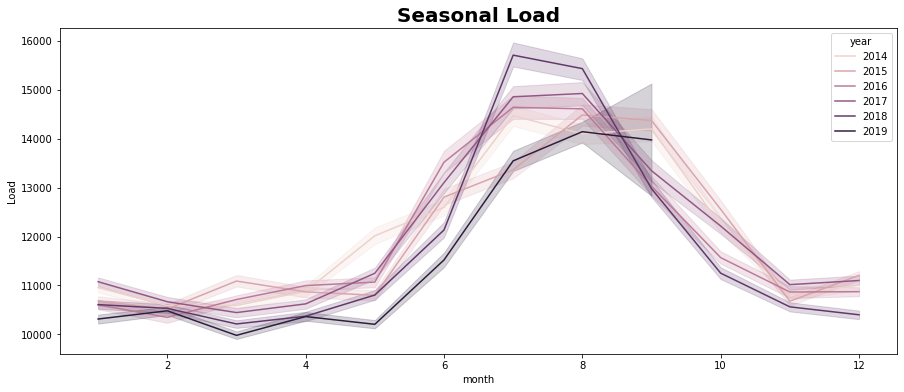

In [57]:
df=df.dropna()
plt.subplots(figsize = (15,6))
sns.lineplot(data = df, x = df['month'], y = df['Load'], hue=df['year'])
plt.title('Seasonal Load',fontsize = 20, loc='center', fontdict=dict(weight='bold'))